In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

import xarray as xr
from pycocotools.coco import COCO
import netCDF4

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from utils.PAD_datamodule import PADDataModule
from utils.settings.config import CROP_ENCODING, IMG_SIZE, LINEAR_ENCODER

Global seed set to 16
Global seed set to 16


In [2]:
def get_window(idx, window_len, image_size, coco_file):
        '''
        Returns the DataSet index for a given patch id and the
        number of subpatches belonging to this patch.

        Patch indexing starts from 0.
        '''
        num_patches = len(COCO(coco_file).imgs)

        num_subpatches = ((IMG_SIZE // image_size[0]), (IMG_SIZE // image_size[1]))
        subpatch_id = idx * (num_subpatches[0] * num_subpatches[1])

        return subpatch_id, num_subpatches

In [3]:
# Define paths
root_path_coco = Path('/home/masdra/NOA/SAgNet/dataset')
coco_train = root_path_coco / 'poc_coco_train.json'
coco_val = root_path_coco / 'poc_coco_val.json'

In [6]:
# Create Data Module
dm = PatchesDataModule(
    root_path_coco=root_path_coco,
    path_train=coco_train,
    path_val=coco_val,
    group_freq='1MS',
    prefix='poc',
    bands=['B02', 'B03', 'B04', 'B08'],
    linear_encoder=LINEAR_ENCODER,
    saved_medians=True,
    window_len=6,
    requires_norm=True,
    return_masks=False,
    clouds=False,
    cirrus=False,
    shadow=False,
    snow=False,
    output_size=[61, 61],
    batch_size=1,
    num_workers=2,
    binary_labels=False,
    return_parcels=True
)

# TRAINING
dm.setup('fit')

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


Text(0.5, 1.0, 'Label')

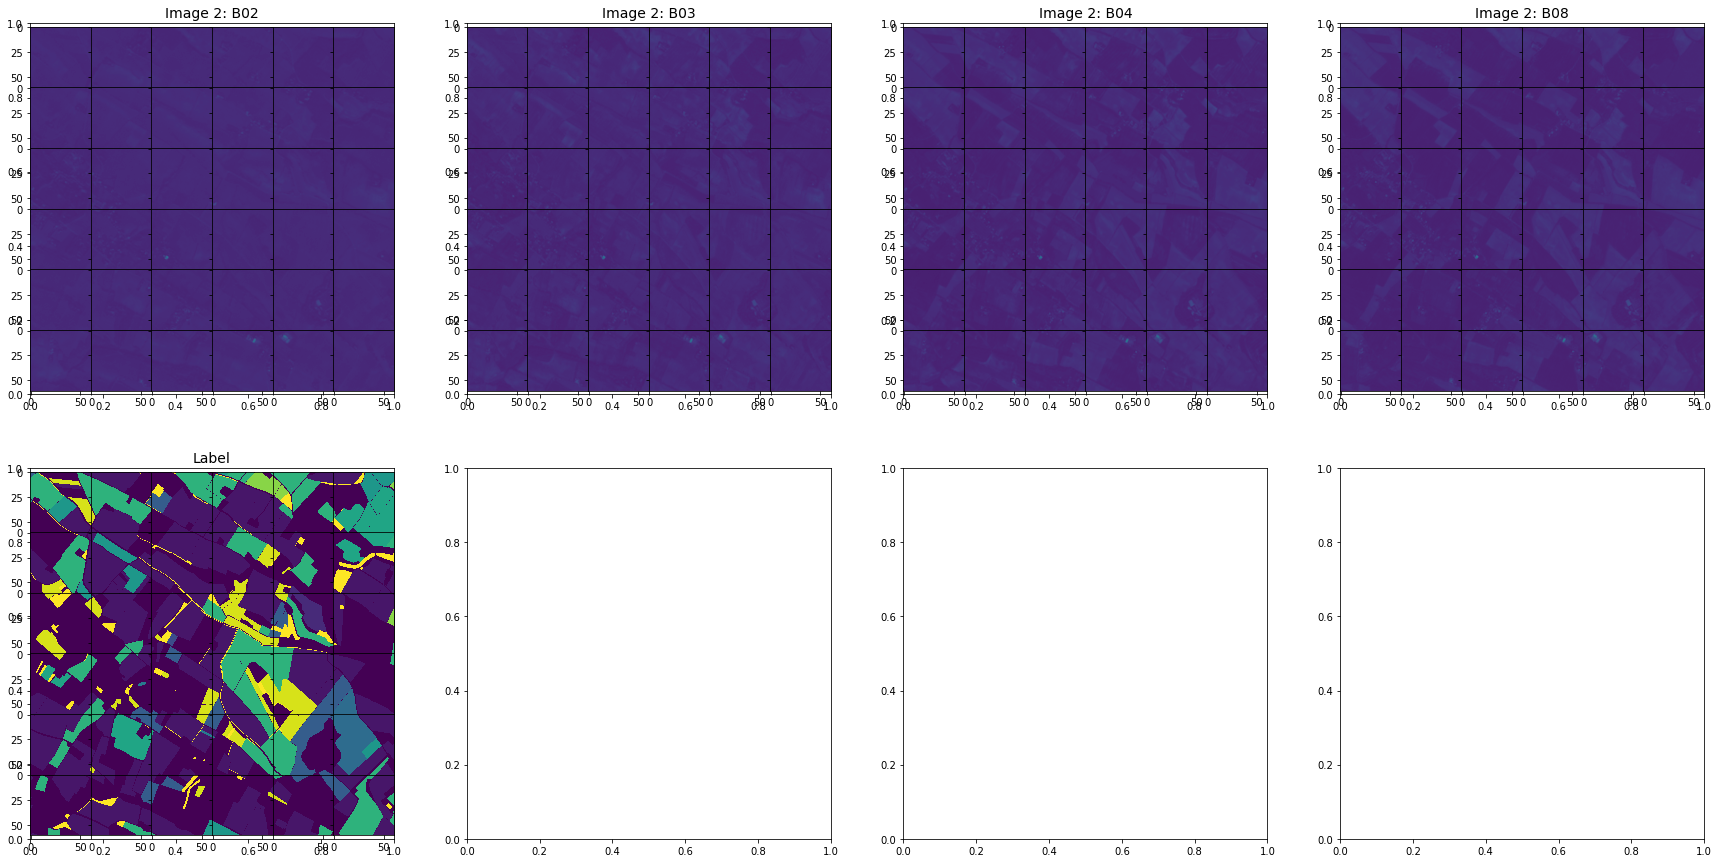

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(30, 15))

image_idx1 = 2

# Image B02
subpatch_id, num_subpatches = get_window(image_idx1 - 1, 6, [61, 61], coco_train)
grid = ImageGrid(fig, 241, nrows_ncols=(num_subpatches[0], num_subpatches[1]), axes_pad=0.0)
for idx in range(num_subpatches[0] * num_subpatches[1]):
    batch = dm.dataset_train.__getitem__(subpatch_id + idx)
    grid[idx].imshow(batch['medians'][0, 0, :, :], vmin=0, vmax=1)

# Image B03
subpatch_id, num_subpatches = get_window(image_idx1 - 1, 6, [61, 61], coco_train)
grid = ImageGrid(fig, 242, nrows_ncols=(num_subpatches[0], num_subpatches[1]), axes_pad=0.0)
for idx in range(num_subpatches[0] * num_subpatches[1]):
    batch = dm.dataset_train.__getitem__(subpatch_id + idx)
    grid[idx].imshow(batch['medians'][0, 1, :, :], vmin=0, vmax=1)
    
# Image B04
subpatch_id, num_subpatches = get_window(image_idx1 - 1, 6, [61, 61], coco_train)
grid = ImageGrid(fig, 243, nrows_ncols=(num_subpatches[0], num_subpatches[1]), axes_pad=0.0)
for idx in range(num_subpatches[0] * num_subpatches[1]):
    batch = dm.dataset_train.__getitem__(subpatch_id + idx)
    grid[idx].imshow(batch['medians'][0, 2, :, :], vmin=0, vmax=1)
    
# Image B08
subpatch_id, num_subpatches = get_window(image_idx1 - 1, 6, [61, 61], coco_train)
grid = ImageGrid(fig, 244, nrows_ncols=(num_subpatches[0], num_subpatches[1]), axes_pad=0.0)
for idx in range(num_subpatches[0] * num_subpatches[1]):
    batch = dm.dataset_train.__getitem__(subpatch_id + idx)
    grid[idx].imshow(batch['medians'][0, 3, :, :], vmin=0, vmax=1)
    
# Label
subpatch_id, num_subpatches = get_window(image_idx1 - 1, 6, [61, 61], coco_train)
grid = ImageGrid(fig, 245, nrows_ncols=(num_subpatches[0], num_subpatches[1]), axes_pad=0.0)
for idx in range(num_subpatches[0] * num_subpatches[1]):
    batch = dm.dataset_train.__getitem__(subpatch_id + idx)
    grid[idx].imshow(batch['labels'].squeeze(), vmin=0, vmax=max(LINEAR_ENCODER.values()))

title_font = {'size': '14'}
axes[0][0].set_title(f'Image {image_idx1}: B02', fontdict=title_font)
axes[0][1].set_title(f'Image {image_idx1}: B03', fontdict=title_font)
axes[0][2].set_title(f'Image {image_idx1}: B04', fontdict=title_font)
axes[0][3].set_title(f'Image {image_idx1}: B08', fontdict=title_font)
axes[1][0].set_title(f'Label', fontdict=title_font)